In [1]:
from qutip import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Simulation

In [2]:
size = 6

# define the Hamiltonian and evolution time
x = sigmax()
z = sigmaz()
i = qeye(2)
n = (i-z)/2

N = size
tensor_ls = [qeye(2) for i in range(N)]
H = tensor(tensor_ls)
for j in range(N-1):
    pauli = [i for k in range(N)]
    pauli[j] = n
    pauli[j+1] = n
    H = H + 2 * np.pi * 4 * 0.05 * tensor(pauli)


for j in range(N):
    pauli = [i for k in range(N)]
    pauli[j] = x
    H = H + 2 * np.pi * 0.02 * tensor(pauli)

# T = 0.25

In [3]:
def ob_value(bin_str1, bin_str2):
    
    if len(bin_str1) != len(bin_str2):
        raise ValueError("Binary strings must have the same length")

    # Compute bitwise product (AND operation)
    bitwise_product = [int(b1) & int(b2) for b1, b2 in zip(bin_str1, bin_str2)]
    
    # Compute modulo 2 sum (XOR sum of all resulting bits)
    mod2_sum = sum(bitwise_product) % 2
    
    return mod2_sum

def z_exp(res, size):
    Z_ob = [format(1 << i, f'0{size}b') for i in range(size)]
    
    ave_z = []
    for ob in Z_ob:
        exp_ob = 0
        for key, value in res.items():
            if ob_value(key, ob) == 0:
                # ground state
                exp_ob = exp_ob - 1 * value
            else:
                # excited state
                exp_ob = exp_ob + 1 * value
        ave_z.append(exp_ob)
    exp_z = sum(ave_z)/len(ave_z)

    return exp_z

def zz_exp(res, size):
    ZZ_ob = []
    for i in range(size-1):
        first_bit = 1 << i
        second_bit = 1 << ((i + 1) % size)  # Wrap around for the last element
        ZZ_ob.append(format(first_bit | second_bit, f'0{size}b'))
    
    ave_zz = []
    for ob in ZZ_ob:
        exp_ob = 0
        for key, value in res.items():
            if ob_value(key, ob) == 0:
                # 00 or 11
                exp_ob = exp_ob + 1 * value
            else:
                # 01 or 10
                exp_ob = exp_ob - 1 * value
        ave_zz.append(exp_ob)
    exp_zz = sum(ave_zz)/len(ave_zz)

    return exp_zz

In [4]:
Ts = np.arange(6.0, 20.1, 0.1)
print(Ts)

[ 6.   6.1  6.2  6.3  6.4  6.5  6.6  6.7  6.8  6.9  7.   7.1  7.2  7.3
  7.4  7.5  7.6  7.7  7.8  7.9  8.   8.1  8.2  8.3  8.4  8.5  8.6  8.7
  8.8  8.9  9.   9.1  9.2  9.3  9.4  9.5  9.6  9.7  9.8  9.9 10.  10.1
 10.2 10.3 10.4 10.5 10.6 10.7 10.8 10.9 11.  11.1 11.2 11.3 11.4 11.5
 11.6 11.7 11.8 11.9 12.  12.1 12.2 12.3 12.4 12.5 12.6 12.7 12.8 12.9
 13.  13.1 13.2 13.3 13.4 13.5 13.6 13.7 13.8 13.9 14.  14.1 14.2 14.3
 14.4 14.5 14.6 14.7 14.8 14.9 15.  15.1 15.2 15.3 15.4 15.5 15.6 15.7
 15.8 15.9 16.  16.1 16.2 16.3 16.4 16.5 16.6 16.7 16.8 16.9 17.  17.1
 17.2 17.3 17.4 17.5 17.6 17.7 17.8 17.9 18.  18.1 18.2 18.3 18.4 18.5
 18.6 18.7 18.8 18.9 19.  19.1 19.2 19.3 19.4 19.5 19.6 19.7 19.8 19.9
 20. ]


In [5]:
# define the initial state
ls_tensor = [basis(2, 0) for i in range(N)]
psi0 = tensor(ls_tensor)


Z_obs = []
ZZ_obs = []

k = 0
for T in Ts:
    if k % 10 == 0:  
        print(k)
    k = k+1
    result = sesolve(H, psi0, [0, T], [], options=Options(nsteps=100000))
    state_real = result.states[1].full()
    num_qubits = int(np.log2(len(state_real)))
    amplitudes = state_real.flatten()  
    probabilities = {
        f"{i:0{num_qubits}b}": abs(amplitudes[i])**2 for i in range(len(amplitudes))
    }
    qutip_res = probabilities
    Z_obs.append(z_exp(qutip_res, size))
    ZZ_obs.append(zz_exp(qutip_res, size))

0
10
20
30
40
50
60
70
80
90

/home/junyuzh/Analog/repo/src/ASPLOS_AE/RealExp/.real/lib/python3.10/site-packages/qutip/solver/options.py:16: FutureWarning: Dedicated options class are no longer needed, options should be passed as dict to solvers.
  warnings.warn(
/home/junyuzh/Analog/repo/src/ASPLOS_AE/RealExp/.real/lib/python3.10/site-packages/qutip/solver/solver_base.py:576: FutureWarning: e_ops will be keyword only from qutip 5.3 for all solver
  warnings.warn(



100
110
120
130
140


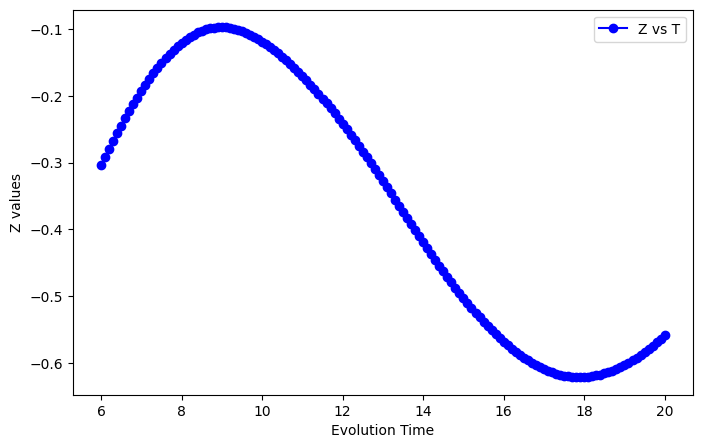

In [6]:
plt.figure(figsize=(8, 5))
plt.plot(Ts, Z_obs, marker='o', linestyle='-', color='b', label="Z vs T")

# Labels and title
plt.xlabel("Evolution Time")
plt.ylabel("Z values")
plt.legend()
plt.show()

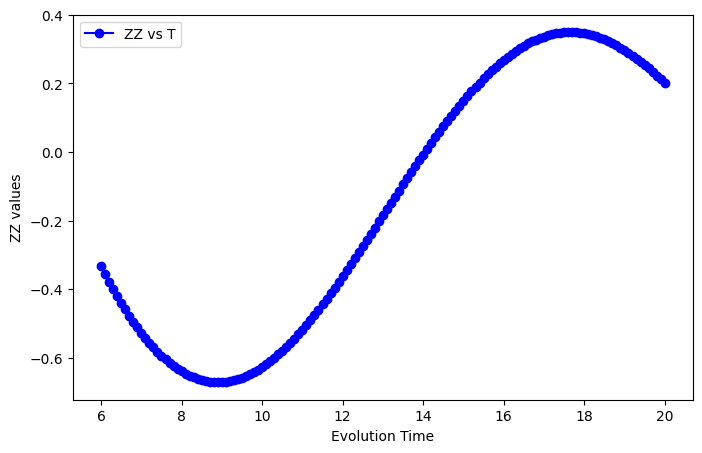

In [7]:
plt.figure(figsize=(8, 5))
plt.plot(Ts, ZZ_obs, marker='o', linestyle='-', color='b', label="ZZ vs T")

# Labels and title
plt.xlabel("Evolution Time")
plt.ylabel("ZZ values")
plt.legend()
plt.show()

In [8]:
import json
data = {
    "exp_Z": Z_obs,
    "exp_ZZ": ZZ_obs
}

# Save to a JSON file
with open("qutip.json", "w") as f:
    json.dump(data, f, indent=4)

print("Data saved successfully!")

Data saved successfully!
